In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from models.surface_trap import SurfaceTrap
from models.surface_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot3d_make_layout

from pytrans.ions import Ca40

In [5]:
from pytrans.analysis.simulate1d import simulate_waveform as simulate_waveform_1d

In [9]:
trap = SurfaceTrap()
waveform = np.load('waveform.npy')

In [44]:
import json

with open('r0.json', 'r') as fp:
    rj = json.load(fp)


In [62]:
x1 = np.asarray(rj['mode_solver_results']['x_eq'])[:, 0]

In [63]:
x1*1e6

array([ -97.18246374, -102.78835382])

In [64]:
x = trap.x_ele(2)
t = np.linspace(0, 25e-6, 1000)
trap.ion = Ca40

x0 = [x]
# x0 = [x - 2e-6, x + 2e-6]
x0 = x1
sim = simulate_waveform_1d(trap, waveform, t, x0)

2


  0%|          | 0/1000 [00:00<?, ?%/s]

Exec solve_ivp


 99%|█████████▉| 994/1000 [00:10<00:00, 118.16%/s]

- solve_ivp elapsed time: 10470.115 ms


100%|██████████| 1000/1000 [00:10<00:00, 95.44%/s]


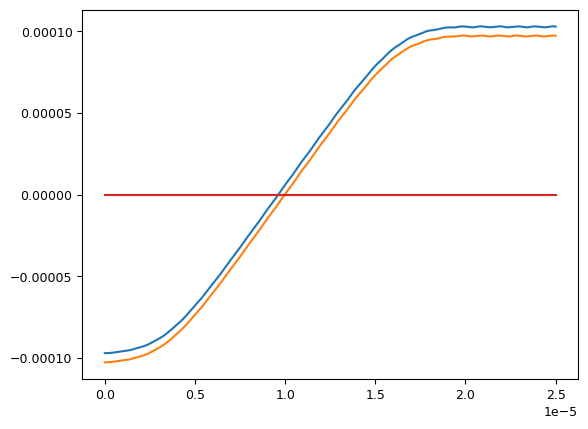

In [65]:
plt.plot(sim.t, sim.y.T)

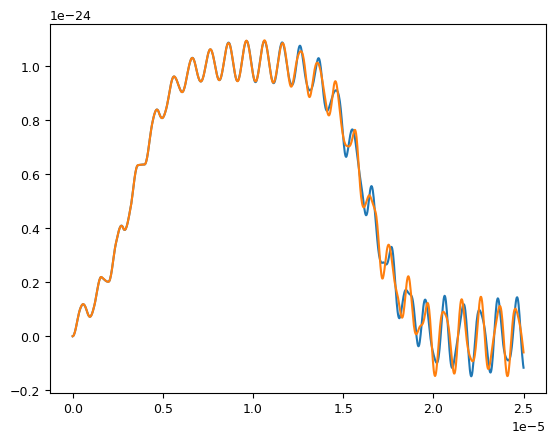

In [66]:
plt.plot(sim.t, sim.y[len(x0):].T)


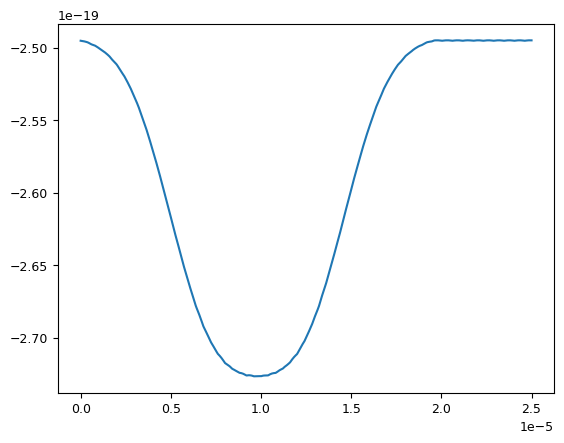

In [61]:
plt.plot(sim.t, sim.energy)